In [42]:
# Using 2 datasets Fake and True and concatenating them, algorithm= logistic regression, accuracy=98%, 40000 entries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn import metrics
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [44]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [45]:
fake['target'] = 'fake'
true['target'] = 'true'

In [46]:
data = pd.concat([fake, true]).reset_index(drop = True)

In [47]:
data.shape

(44898, 5)

In [48]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [49]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [50]:
data.drop(["date"],axis=1,inplace=True)

In [51]:
data.drop(["title"],axis=1,inplace=True)

In [52]:
data['text'] = data['text'].apply(lambda x: x.lower())

In [53]:
data.head()

,text,subject,target
0,las vegas (reuters) - u.s. president donald tr...,politicsNews,true
1,jakarta (reuters) - indonesia s capital has sh...,worldnews,true
2,(reuters) - democratic u.s. representative joh...,politicsNews,true
3,"washington (reuters) - as a candidate, u.s. pr...",politicsNews,true
4,"katy, texas (reuters) - as democrats try to wi...",politicsNews,true


In [54]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['text'] = data['text'].apply(punctuation_removal)

In [55]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Idea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


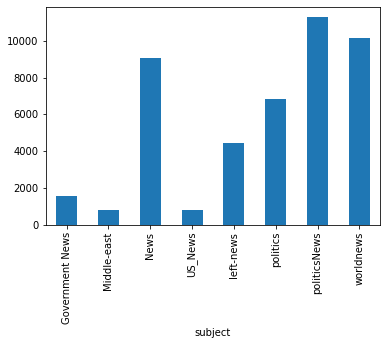

In [56]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


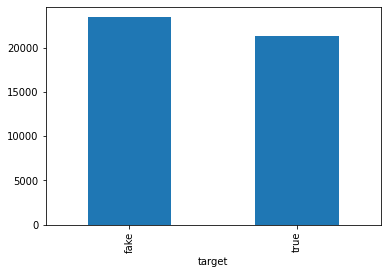

In [57]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [58]:
from nltk import tokenize
import seaborn as sns
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

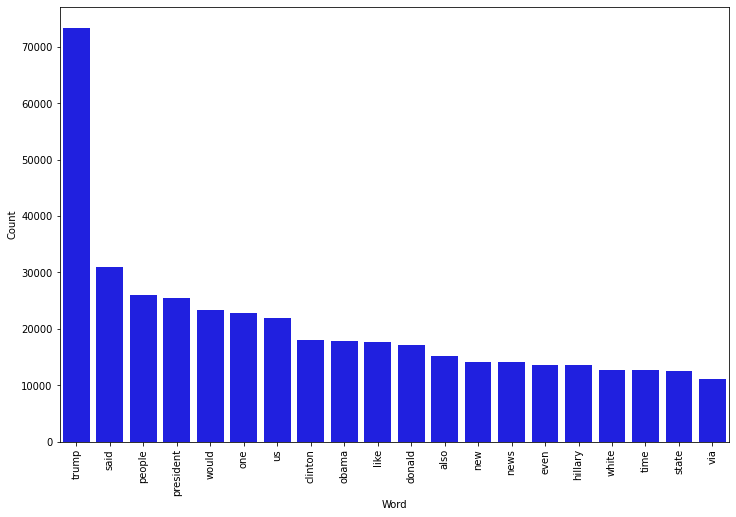

In [59]:
counter(data[data["target"] == "fake"], "text", 20)

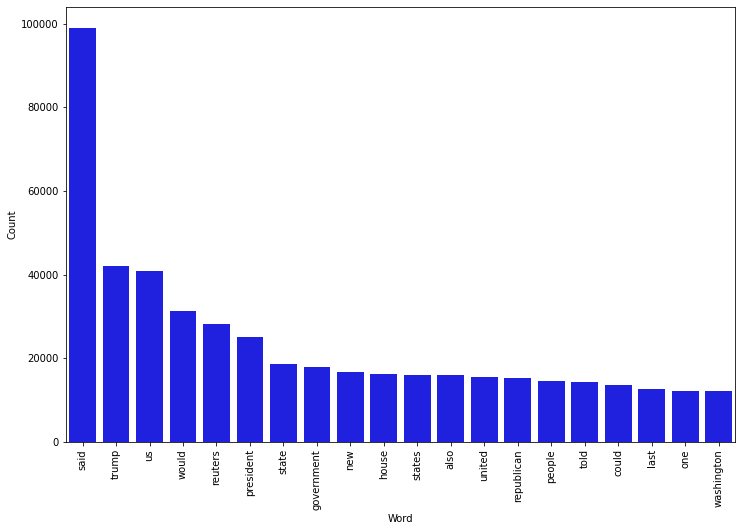

In [60]:
counter(data[data["target"] == "true"], "text", 20)

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [62]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [63]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.66%


Confusion matrix, without normalization


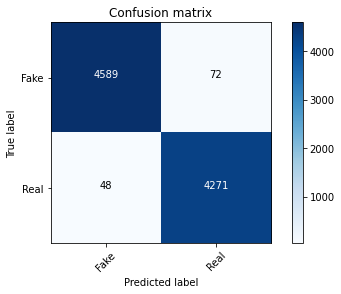

In [64]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [65]:
y_train

36335    true
12384    true
24419    fake
24740    fake
27039    true
         ... 
11284    true
44732    fake
38158    fake
860      fake
15795    true
Name: target, Length: 35918, dtype: object

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [67]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(X_train)
tfid_x_test = tfvect.transform(X_test)

In [68]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [69]:
y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.43%


In [70]:
cf = confusion_matrix(y_test,y_pred, labels=['fake','true'])
print(cf)

[[4635   26]
 [  25 4294]]


In [71]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [72]:
fake_news_det('Former CIA Director Slams Trump Over UN Bullying, Openly Suggests Heâ€™s Acting Like A Dictator(TWEET)')

['fake']


In [73]:
fake_news_det('''WASHINGTON (Reuters) - The leaders of the U.S. intelligence community on Thursday pressed 
Congress to renew the National Security Agencyâ€™s expiring surveillance law, 
warning in a rare public statement that national security may be endangered if lawmakers let it lapse. 
The message from the intelligence chiefs sought to apply pressure on lawmakers who appeared to abandon an effort this week 
to pass legislation that would have reauthorized for several years the NSAâ€™s warrantless internet spying program, 
which is due to expire on Dec. 31. That plan cratered late on Wednesday amid objections from a sizable coalition of Republicans
and Democrats who want to have more privacy safeguards in the program, 
which chiefly targets foreigners but also collects communications from an unknown number of Americans.
Instead, House Republicans unveiled a stopgap funding measure on Thursday that includes an extension of the surveillance law until Jan. 19. The law, known as Section 702 of the Foreign Intelligence Surveillance Act, 
is considered by U.S. intelligence agencies to be vital to national security. 
â€œThere is no substitute for Section 702,â€ Director of National Intelligence Dan Coats, 
Attorney General Jeff Sessions, and the directors the NSA, FBI and CIA wrote in the joint statement, 
adding that failure to renew the authority would make it easier for foreign adversaries to â€œplan attacks against our citizens and allies without detection.â€ 
Section 702 allows the NSA to collect vast amounts of digital communications from foreign suspects living outside the United States. But the program incidentally gathers communications of Americans for a variety of technical reasons, 
including if they communicate with a foreign target living overseas. Those communications can then be subject to searches without a warrant, including by the Federal Bureau of Investigation. Some lawmakers in both parties want to eliminate or partially restrict the U.S. governmentâ€™s ability to review data of Americans collected under Section 702 without first obtaining a warrant. The intelligence chiefs also criticized the current plan to temporarily extend the program, saying short-term extensions â€œfail to provide certainty and will create needless and wasteful operational complications.â€ U.S. officials recently acknowledged the end-year deadline may not matter much because of a belief the program can lawfully continue through April due to the way it is annually certified.  In their statement, however, the intelligence chiefs warned that the surveillance program would need to begin â€œwinding downâ€
well in advance of the April date. ''')

['true']


In [74]:
fake_news_det('Human beings are stupid')

['fake']


In [75]:
fake_news_det('UFOs are for real')

['fake']


In [76]:
fake_news_det('Jazz group BLACKPINK becomes most subscribed YouTube artist')

['fake']


In [77]:
fake_news_det("Mueller's Russia probe cost his office $3.2 million in first four months")

['true']


In [79]:
fake_news_det('humans are the worse than animals')

['fake']
